In [155]:

#In-Vehicle Coupon Recommendation

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split                  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [157]:
in_vehicle_coupon = pd.read_csv(r"C:\Users\Dell\Downloads\in-vehicle-coupon-recommendation.csv")

In [158]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
in_vehicle_coupon 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [160]:
in_vehicle_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [161]:
in_vehicle_coupon.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [162]:
in_vehicle_coupon.describe

<bound method NDFrame.describe of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h

In [163]:
in_vehicle_coupon.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [164]:
missing_percentage = (in_vehicle_coupon.isnull().sum() / len(in_vehicle_coupon)) * 100
print(missing_percentage)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


In [165]:
in_vehicle_coupon.drop(columns=['car'], inplace=True)

In [166]:
in_vehicle_coupon['Bar'].fillna('Unknown', inplace=True)
in_vehicle_coupon['CoffeeHouse'].fillna(in_vehicle_coupon['CoffeeHouse'].mode()[0], inplace=True)

In [167]:
# Fill numeric columns with median
numeric_cols = in_vehicle_coupon.select_dtypes(include=['number']).columns
in_vehicle_coupon[numeric_cols] = in_vehicle_coupon[numeric_cols].fillna(in_vehicle_coupon[numeric_cols].median())

# Fill categorical columns with mode (most frequent value)
categorical_cols = in_vehicle_coupon.select_dtypes(include=['object']).columns
in_vehicle_coupon[categorical_cols] = in_vehicle_coupon[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [168]:
in_vehicle_coupon.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [169]:
in_vehicle_coupon.describe

<bound method NDFrame.describe of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h

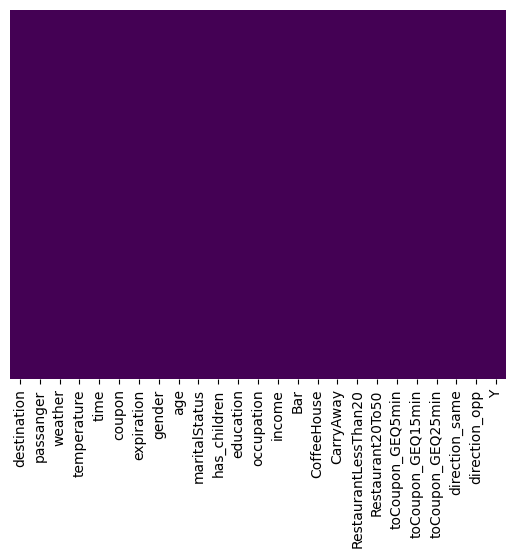

In [170]:
sns.heatmap(in_vehicle_coupon.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [171]:
# no nullvalues as show above 

In [172]:
in_vehicle_coupon.info

<bound method DataFrame.info of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  

In [173]:
in_vehicle_coupon.dtypes


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [174]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns (object type)
categorical_cols = in_vehicle_coupon.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    in_vehicle_coupon[col] = le.fit_transform(in_vehicle_coupon[col])
    label_encoders[col] = le  # Save the encoder if needed for future decoding

In [175]:
in_vehicle_coupon.dtypes

destination             int32
passanger               int32
weather                 int32
temperature             int64
time                    int32
coupon                  int32
expiration              int32
gender                  int32
age                     int32
maritalStatus           int32
has_children            int64
education               int32
occupation              int32
income                  int32
Bar                     int32
CoffeeHouse             int32
CarryAway               int32
RestaurantLessThan20    int32
Restaurant20To50        int32
toCoupon_GEQ5min        int64
toCoupon_GEQ15min       int64
toCoupon_GEQ25min       int64
direction_same          int64
direction_opp           int64
Y                       int64
dtype: object

In [176]:
in_vehicle_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int32
 1   passanger             12684 non-null  int32
 2   weather               12684 non-null  int32
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int32
 5   coupon                12684 non-null  int32
 6   expiration            12684 non-null  int32
 7   gender                12684 non-null  int32
 8   age                   12684 non-null  int32
 9   maritalStatus         12684 non-null  int32
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int32
 12  occupation            12684 non-null  int32
 13  income                12684 non-null  int32
 14  Bar                   12684 non-null  int32
 15  CoffeeHouse           12684 non-null  int32
 16  Carr

In [177]:
x =in_vehicle_coupon.iloc[:,:-1]

In [178]:
x

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,55,2,4,0,0,0,3,...,5,4,0,1,0,1,0,0,0,1
1,1,1,2,80,0,2,1,0,0,3,...,5,4,0,1,0,1,0,0,0,1
2,1,1,2,80,0,1,1,0,0,3,...,5,4,0,1,0,1,1,0,0,1
3,1,1,2,80,2,2,1,0,0,3,...,5,4,0,1,0,1,1,0,0,1
4,1,1,2,80,2,2,0,0,0,3,...,5,4,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,3,1,0,1,1,2,...,5,4,0,1,0,1,0,0,1,0
12680,2,0,0,55,4,1,0,1,1,2,...,5,4,0,1,0,1,0,0,0,1
12681,2,0,1,30,4,2,0,1,1,2,...,5,4,0,1,0,1,0,0,1,0
12682,2,0,1,30,4,0,0,1,1,2,...,5,4,0,1,0,1,1,1,0,1


In [179]:
y =in_vehicle_coupon.iloc[:,-1]

In [180]:
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int64

In [181]:
in_vehicle_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,...,4,0,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,...,4,0,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,...,4,0,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,...,4,0,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,...,4,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,3,1,0,1,1,2,...,4,0,1,0,1,0,0,1,0,1
12680,2,0,0,55,4,1,0,1,1,2,...,4,0,1,0,1,0,0,0,1,1
12681,2,0,1,30,4,2,0,1,1,2,...,4,0,1,0,1,0,0,1,0,0
12682,2,0,1,30,4,0,0,1,1,2,...,4,0,1,0,1,1,1,0,1,0


In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [183]:
x_train

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
1326,1,1,2,80,0,2,1,0,5,2,...,5,3,0,0,0,1,0,0,0,1
4058,0,0,2,80,1,1,0,0,0,1,...,5,4,1,1,3,1,0,0,1,0
4723,1,1,2,80,2,4,1,1,7,2,...,5,1,0,1,3,1,1,0,0,1
11893,1,1,1,30,2,4,0,1,1,2,...,0,4,1,0,3,1,0,0,0,1
1567,1,0,2,55,2,4,0,1,2,2,...,4,4,0,3,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,2,0,0,55,4,3,0,1,1,2,...,3,2,2,2,2,1,1,1,0,1
1661,1,1,2,55,2,1,0,1,6,3,...,3,4,0,1,0,1,1,0,0,1
11595,1,1,1,30,2,4,0,0,0,2,...,5,4,3,4,4,1,0,0,0,1
552,1,1,2,80,2,4,0,0,5,2,...,5,3,3,3,4,1,1,0,0,1


In [184]:
x_test

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
5811,1,1,2,55,2,2,0,1,2,1,...,4,3,1,3,3,1,0,0,0,1
6378,0,0,2,80,1,4,1,0,1,3,...,0,2,2,2,2,1,0,0,1,0
10542,2,0,2,30,4,0,0,0,6,1,...,5,4,1,3,0,1,1,0,1,0
2938,1,0,2,55,2,4,0,1,6,1,...,0,3,1,0,0,1,0,0,0,1
9048,1,0,1,30,2,0,0,1,2,1,...,5,3,2,1,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,3,2,80,3,4,1,0,0,3,...,5,0,0,1,4,1,0,0,0,1
7714,1,1,2,30,1,4,1,0,2,2,...,5,1,2,1,3,1,0,0,0,1
7696,1,3,0,55,2,4,1,1,6,1,...,4,3,3,0,0,1,1,0,0,1
4121,0,0,2,80,3,4,1,1,2,1,...,5,4,0,0,4,1,0,0,1,0


In [185]:
y_train

1326     1
4058     1
4723     1
11893    0
1567     1
        ..
7791     1
1661     0
11595    1
552      1
2247     1
Name: Y, Length: 8878, dtype: int64

In [186]:
y_test

5811     1
6378     1
10542    0
2938     1
9048     1
        ..
1314     1
7714     0
7696     0
4121     1
11315    1
Name: Y, Length: 3806, dtype: int64

In [187]:
#model creation

In [188]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [189]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [190]:
y_predictions = logmodel.predict(x_test)

In [191]:
y_predictions

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50      1653
           1       0.64      0.77      0.70      2153

    accuracy                           0.62      3806
   macro avg       0.62      0.60      0.60      3806
weighted avg       0.62      0.62      0.61      3806



In [193]:
# Performance Evaluation
#MAE
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error is",mean_absolute_error(y_test,y_predictions))


Mean Absolute error is 0.37545980031529164


In [194]:
#Mean Absolute Percentage error
from sklearn.metrics import mean_absolute_percentage_error
print("Error Percentage is: ",mean_absolute_percentage_error(y_test,y_predictions))

Error Percentage is:  1112292078226029.0


In [195]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test,y_predictions))

Mean Squared Error:  0.37545980031529164


In [196]:
#Root Mean Squared Error--->to find squre root of root mean square
root=mean_squared_error(y_test,y_predictions)
squ=np.sqrt(root)
print(squ)

0.612747746071164


In [197]:
#r2 score=====> coefficence of determination
from sklearn.metrics import r2_score
print("r2 score is",r2_score(y_test,y_predictions))

r2 score is -0.5282138430625791


Accuracy: 0.6245401996847083
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.43      0.50      1653
           1       0.64      0.77      0.70      2153

    accuracy                           0.62      3806
   macro avg       0.62      0.60      0.60      3806
weighted avg       0.62      0.62      0.61      3806

Confusion Matrix:


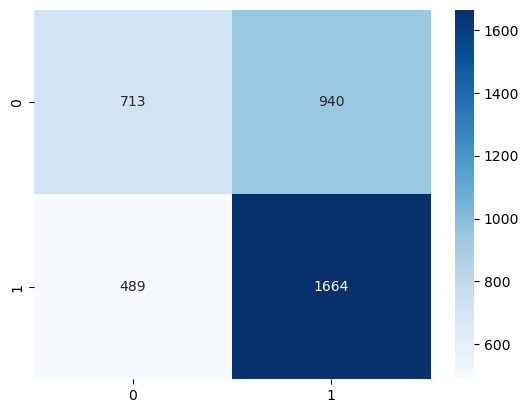

In [198]:
# Step 7: Evaluate Models
y_pred = logmodel.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [199]:
#Random Forest

In [200]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [201]:
y_pred = model.predict(x_test)

In [202]:
result=confusion_matrix(y_test,y_pred)
result

array([[1051,  602],
       [ 415, 1738]], dtype=int64)

In [203]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.732790331056227


In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.67      1653
           1       0.74      0.81      0.77      2153

    accuracy                           0.73      3806
   macro avg       0.73      0.72      0.72      3806
weighted avg       0.73      0.73      0.73      3806



In [205]:
#KNN Classifier


In [206]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [207]:
y_pred_knn = knn_model.predict(x_test)

In [208]:
result=confusion_matrix(y_test,y_pred_knn)
result

array([[ 853,  800],
       [ 658, 1495]], dtype=int64)

In [209]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.6169206516027326


In [210]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1653
           1       0.65      0.69      0.67      2153

    accuracy                           0.62      3806
   macro avg       0.61      0.61      0.61      3806
weighted avg       0.61      0.62      0.61      3806



In [211]:
#DecesionTree Classifer

In [212]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [213]:
y_pred_dt = dt_model.predict(x_test)

In [214]:
result=confusion_matrix(y_test,y_pred_dt)
result

array([[1041,  612],
       [ 607, 1546]], dtype=int64)

In [215]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.6797162375197058


In [216]:
#SVMClassifer

In [217]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [218]:
y_pred_svm = svm_model.predict(x_test)

In [219]:
result=confusion_matrix(y_test,y_pred_svm)
result

array([[ 673,  980],
       [ 445, 1708]], dtype=int64)

In [220]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.6255911718339464


In [221]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49      1653
           1       0.64      0.79      0.71      2153

    accuracy                           0.63      3806
   macro avg       0.62      0.60      0.60      3806
weighted avg       0.62      0.63      0.61      3806

